In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
from tensorflow.examples.tutorials.mnist import input_data
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import math as math

In [2]:
DATA_DIR = 'MNIST'
STEPS = 5000
MINIBATCH_SIZE = 100

imgDim = 28
imgChannels = 1
nClasses = 10

In [3]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, name1):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME',name = name1)

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

def conv_layer(input, shape, name1):
    W = weight_variable(shape,)
    b = bias_variable([shape[3]])
    return tf.nn.relu(conv2d(input, W, name1) + b)

def full_layer(input, size):
    in_size = int(input.get_shape()[1])
    W = weight_variable([in_size, size])
    b = bias_variable([size])
    return tf.matmul(input, W) + b

def display_images(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.hstack([images[i] for i in range(size)])
    plt.imshow(im)
    plt.show()
    
def display_custom1(custom_item):
    n_items = custom_item.shape[3]
    for i in range(n_items):
        plt.imshow(cv1[0,:,:,i],cmap = "gray")
        plt.show()

def display_custom(custom_item, i):
    plotNNFilter(custom_item, i)
        
        
def plotNNFilter(units, image_index):
    filters = units.shape[3]
    plt.figure(image_index, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[image_index,:,:,i], interpolation="nearest", cmap="gray")
        
def plotNNFeatureMap(units, image_index):
    filters = units.shape[3]
    plt.figure(image_index, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Feature Map' + str(i))
        plt.imshow(units[image_index,:,:,i], interpolation="nearest", cmap="gray")

In [5]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
x_image = tf.reshape(x, [-1, 28, 28, 1])
conv1 = conv_layer(x_image, shape=[5, 5, 1, 32],name1 = 'conv1')
conv1_pool = max_pool_2x2(conv1)
conv2 = conv_layer(conv1_pool, shape=[5, 5, 32, 64],name1 = 'conv2')
conv2_pool = max_pool_2x2(conv2)
conv2_flat = tf.reshape(conv2_pool, [-1, 7 * 7 * 64])
full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))
keep_prob = tf.placeholder(tf.float32)
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)
y_conv = full_layer(full1_drop, 10)


    

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.0
test accuracy: 0.0703999996185
[u'Variable:0', u'Variable_1:0', u'Variable_2:0', u'Variable_3:0', u'Variable_4:0', u'Variable_5:0', u'Variable_6:0', u'Variable_7:0', u'beta1_power:0', u'beta2_power:0', u'Variable/Adam:0', u'Variable/Adam_1:0', u'Variable_1/Adam:0', u'Variable_1/Adam_1:0', u'Variable_2/Adam:0', u'Variable_2/Adam_1:0', u'Variable_3/Adam:0', u'Variable_3/Adam_1:0', u'Variable_4/Adam:0', u'Variable_4/Adam_1:0', u'Variable_5/Adam:0', u'Variable_5/Adam_1:0', u'Variable_6/Adam:0', u'Variable_6/Adam_1:0', u'Variable_7/Adam:0', u'Variable_7/Adam_1:0', u'beta1_power_1:0', u'beta2_power_1:0', u'Variable/Adam_2:0', u'Variable/Adam_3:0', u'Variable_1/Adam_2:0', u'Variable_1/Adam_3:0', u'Variable_2/Adam_2:0', u'Variable_2/Adam_3:0', u'Variable_3/Adam_2:0', u'Variable_3/Adam_3:0', u'

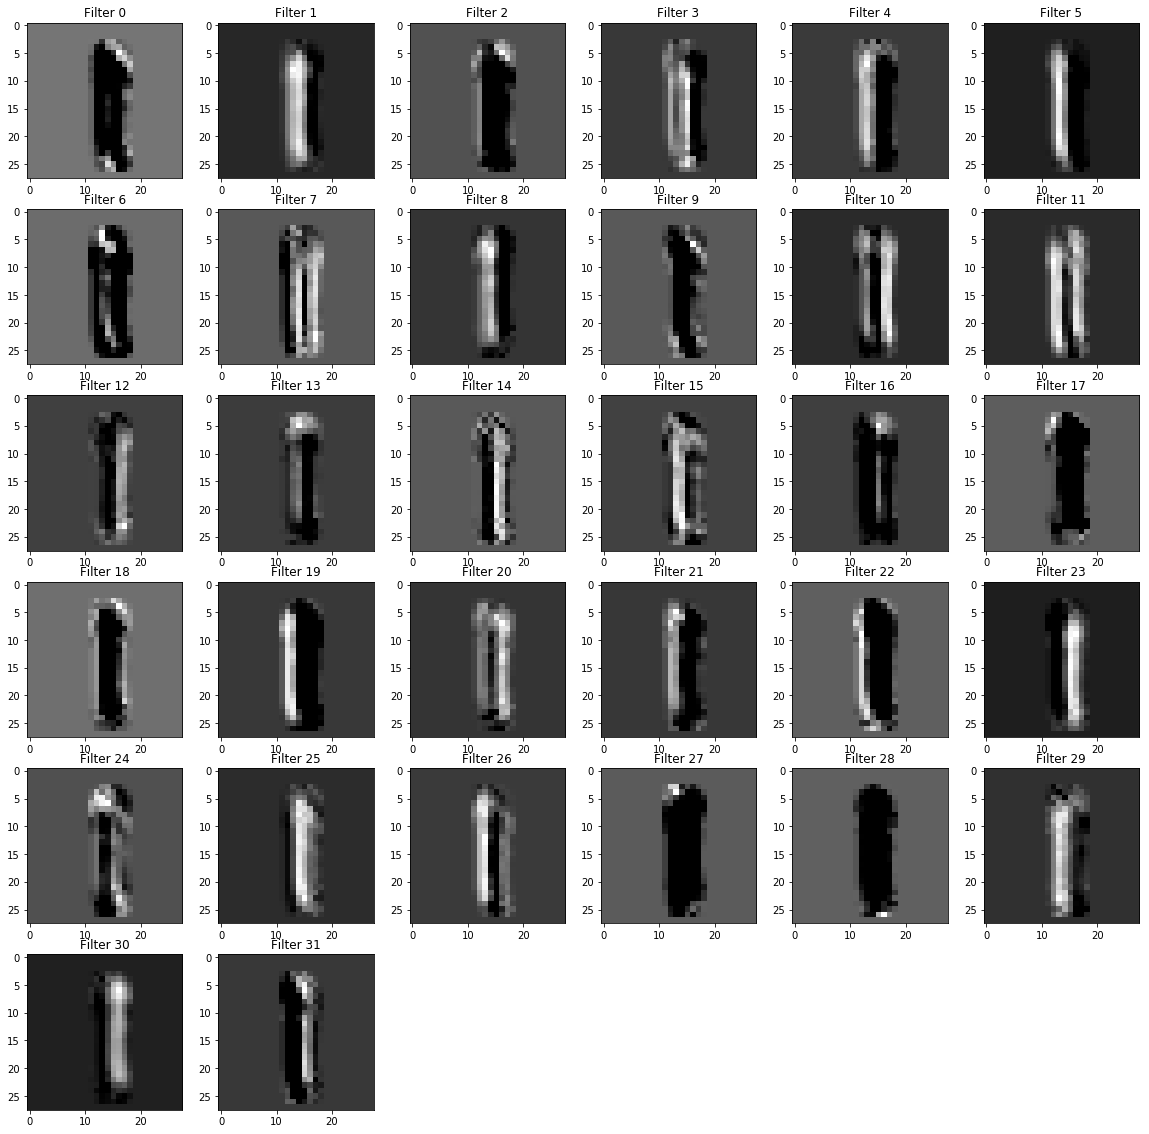

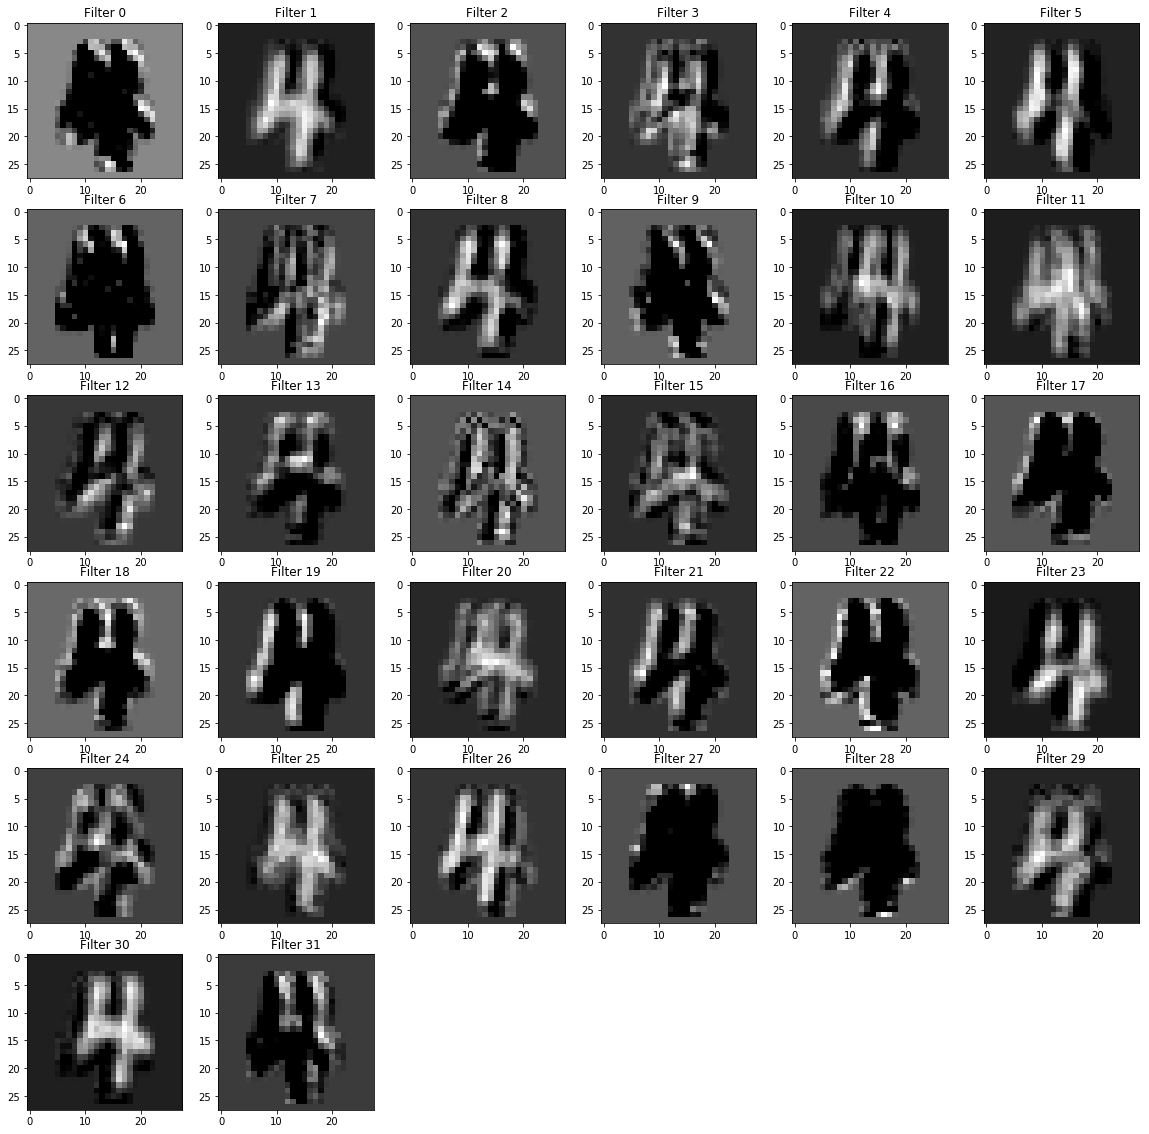

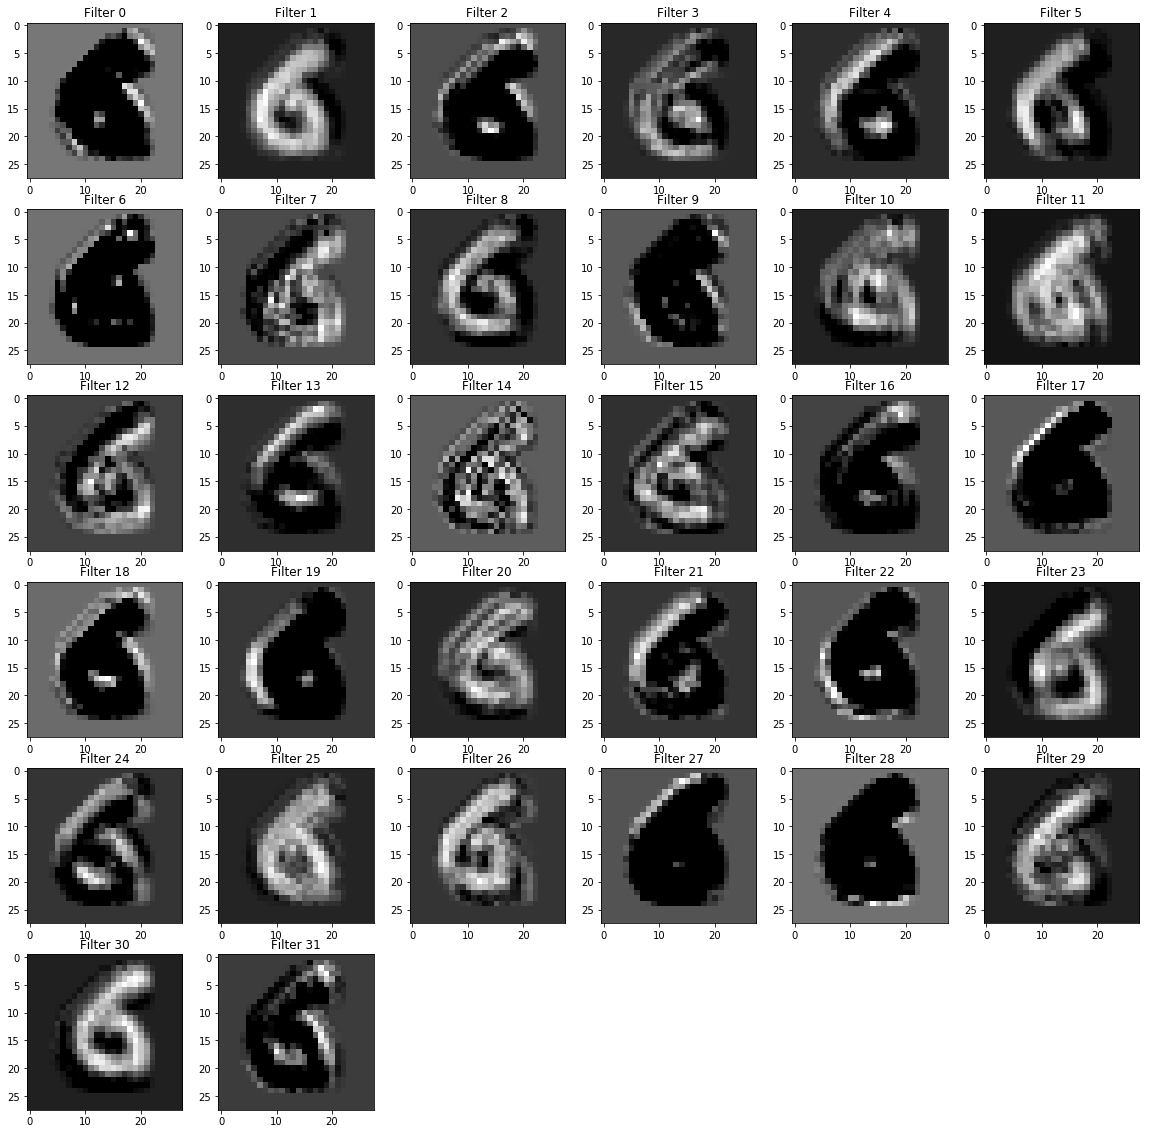

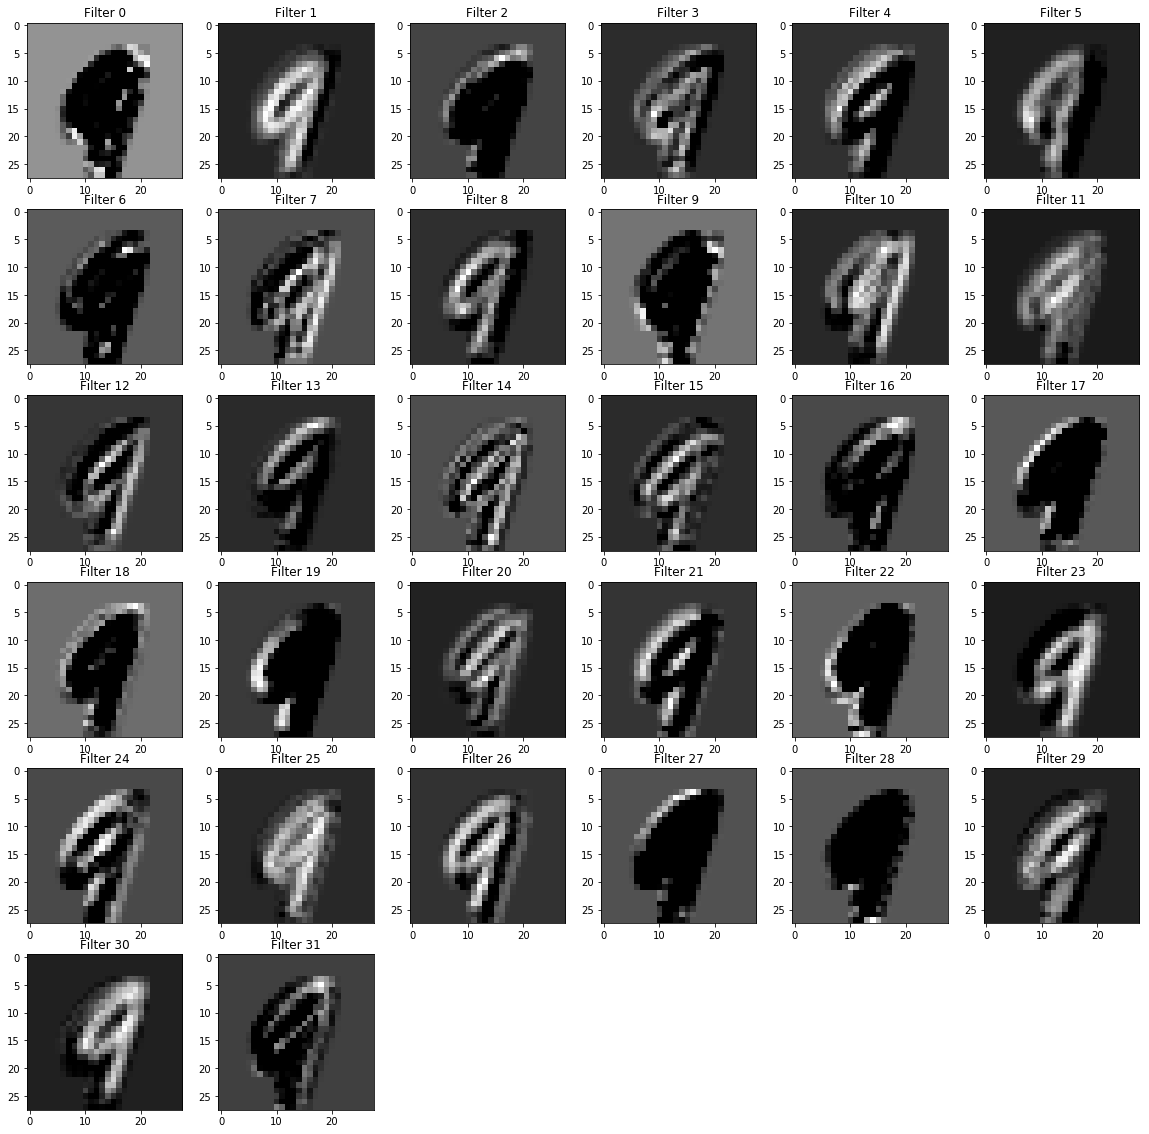

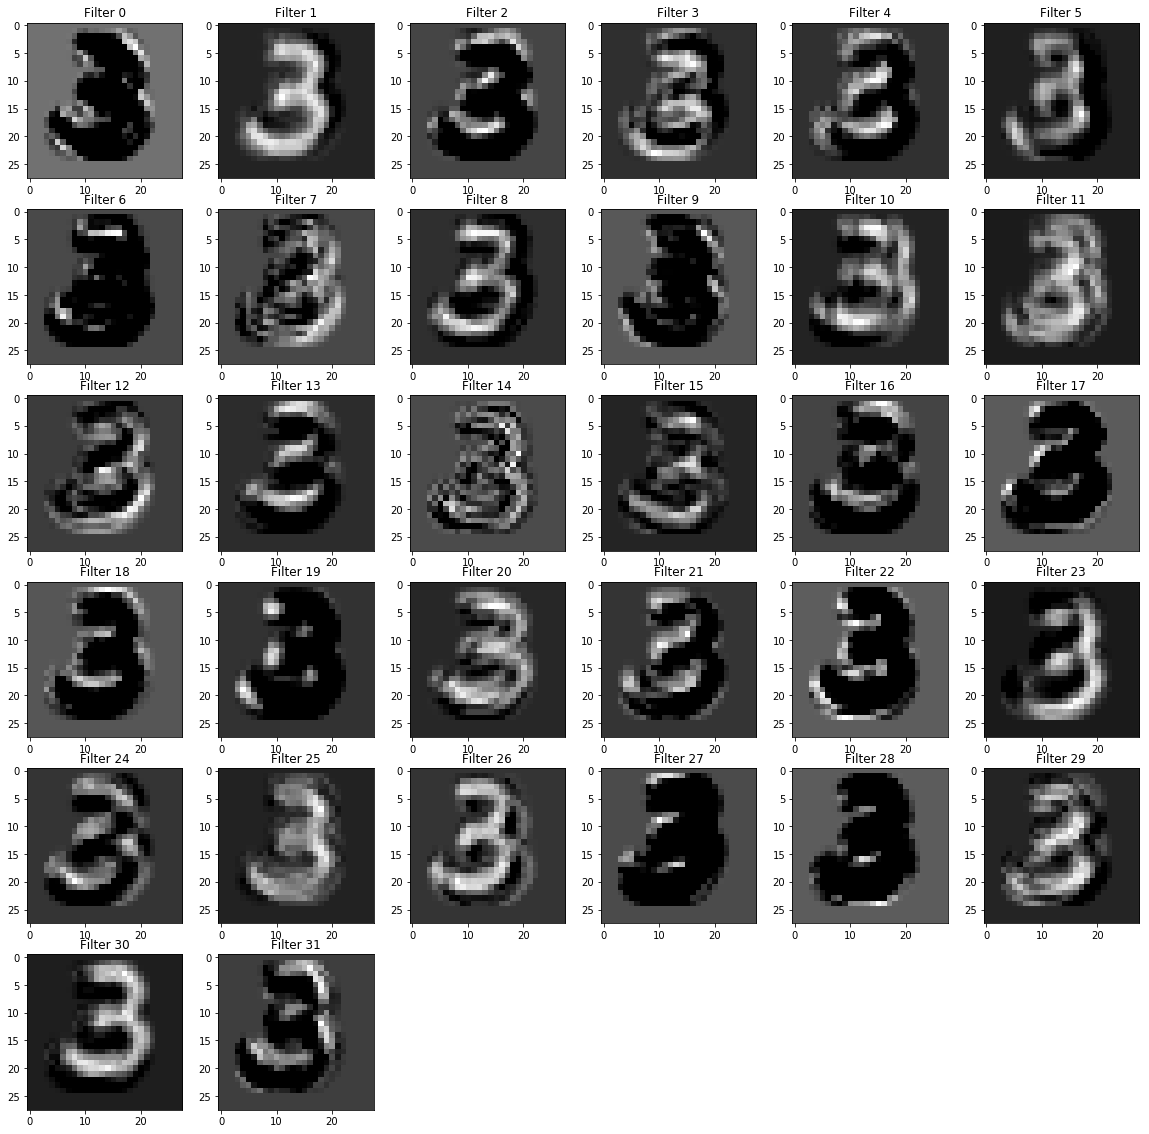

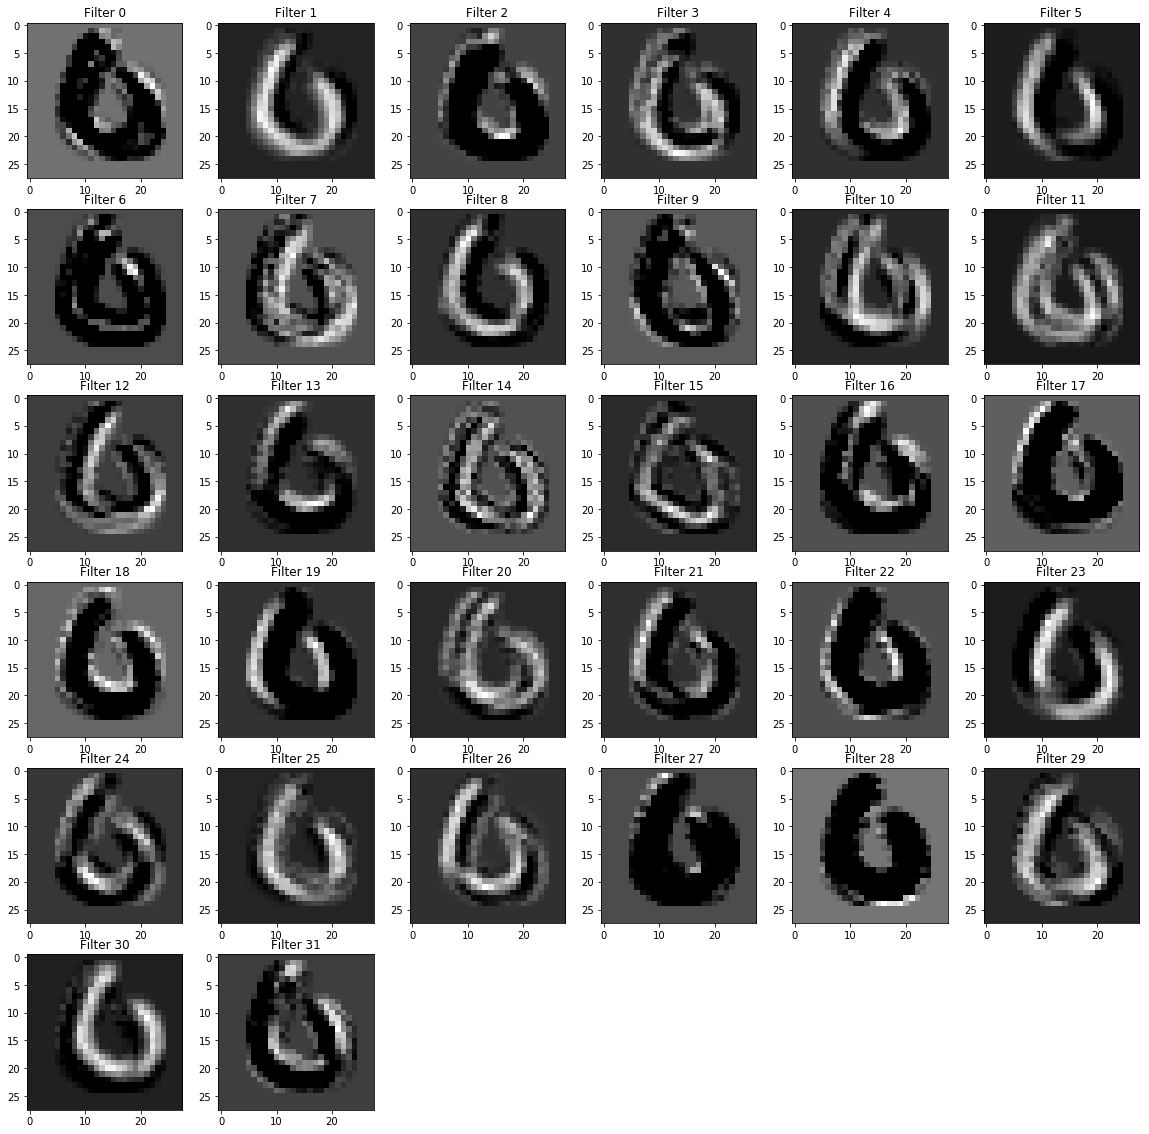

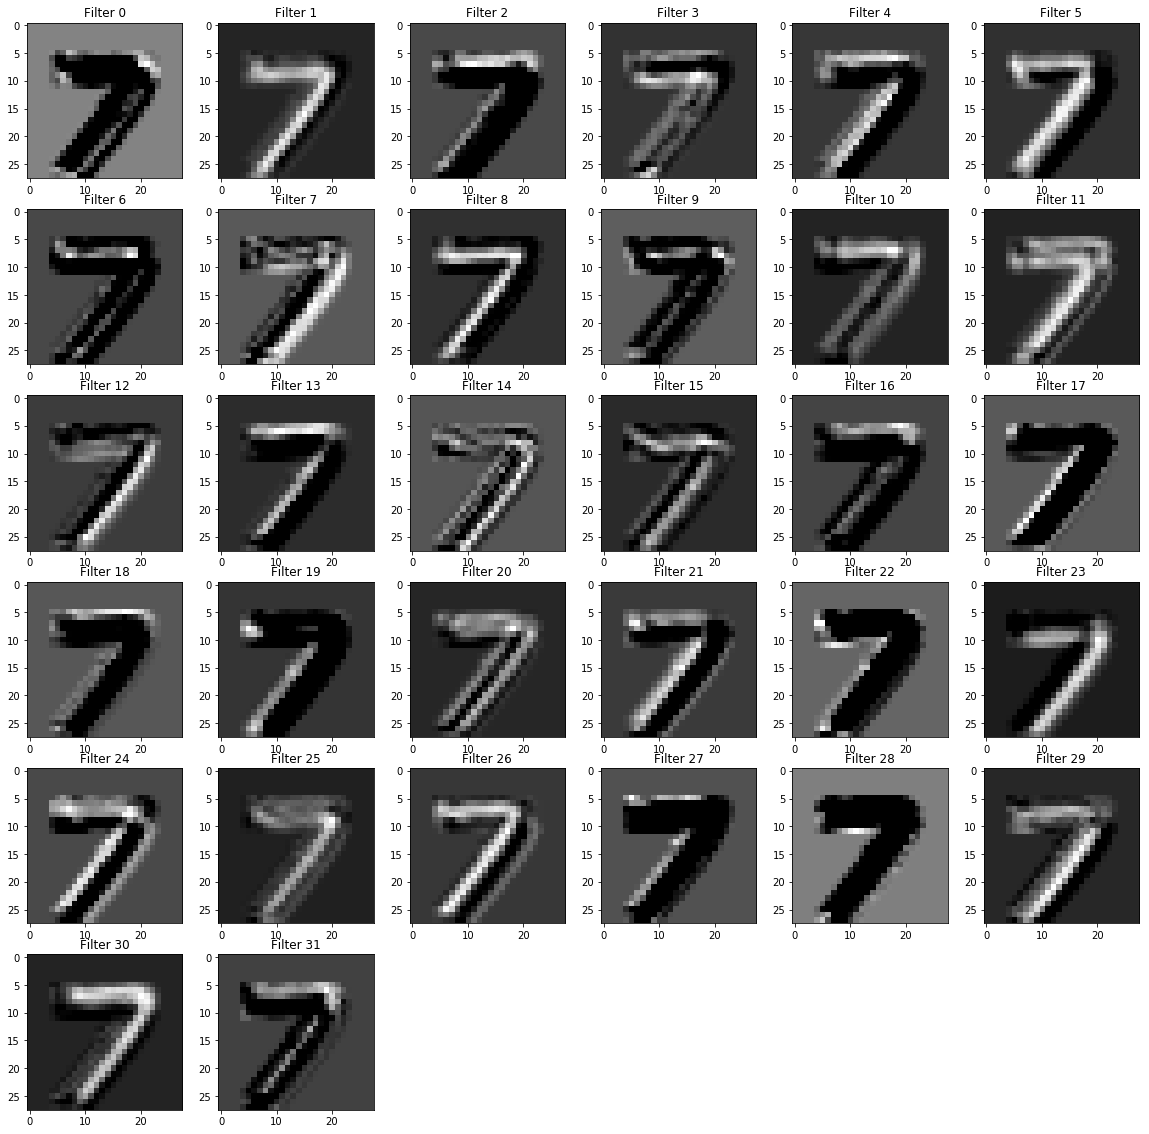

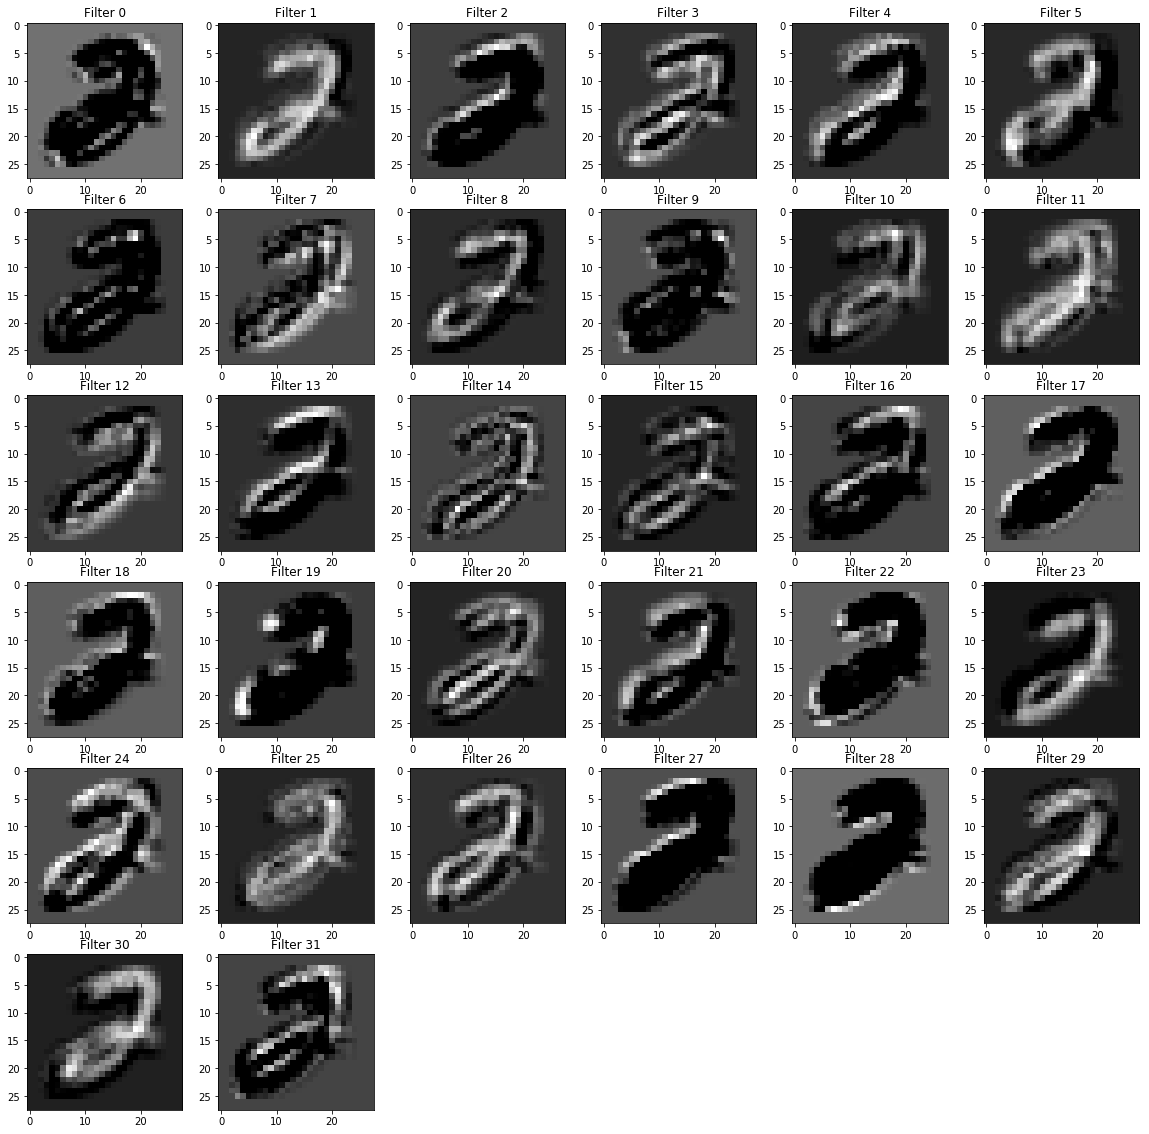

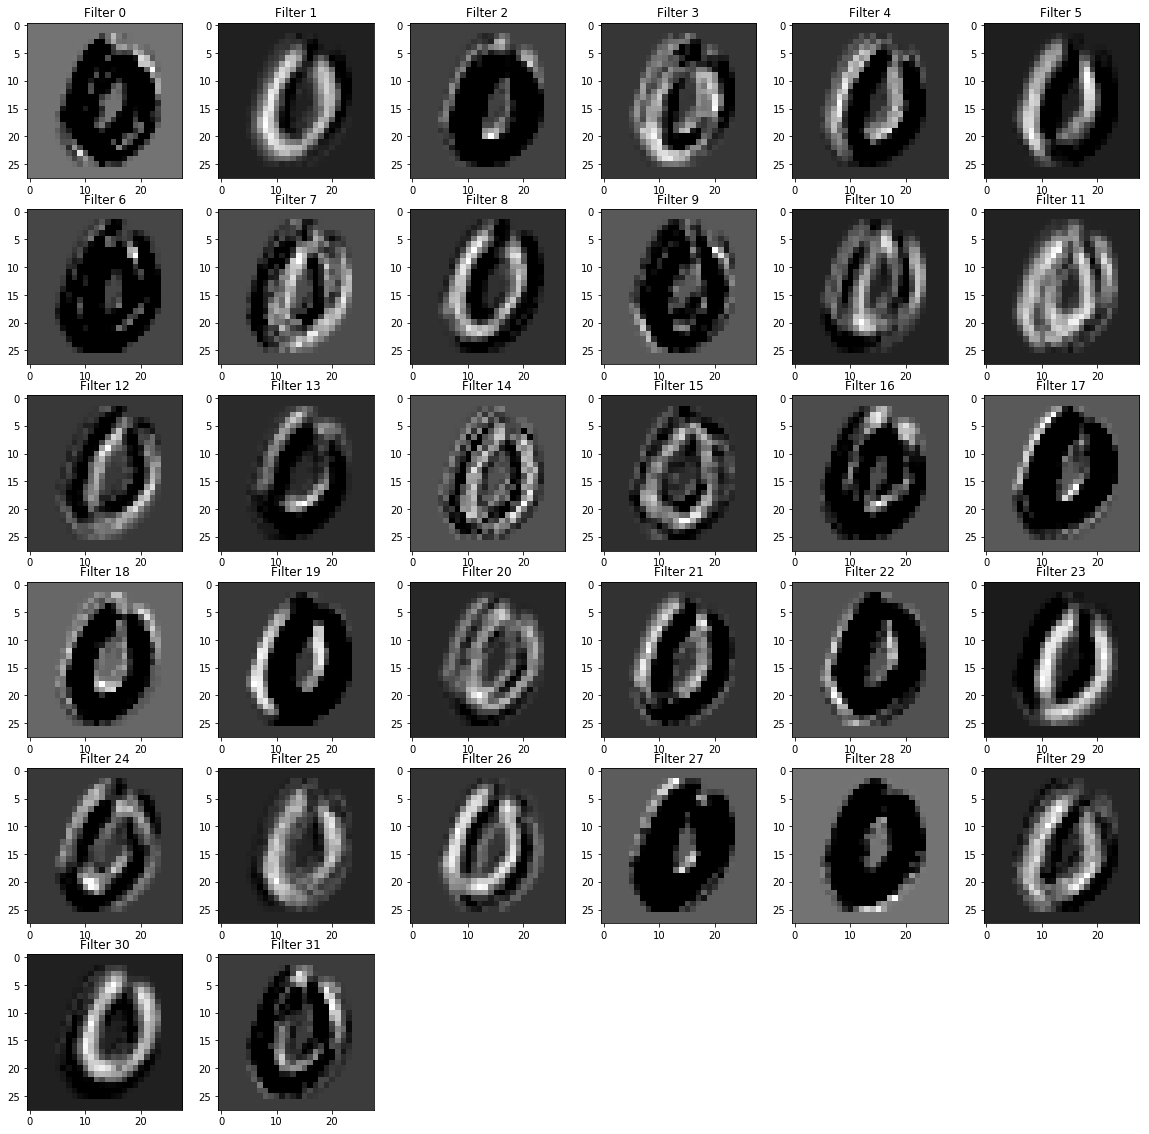

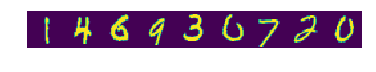

In [9]:
STEPS = 2  #Ideal value 2000
MINIBATCH_SIZE = 5 #Ideal value 400

mnist = input_data.read_data_sets(DATA_DIR, one_hot=True)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv,labels= y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(STEPS):
        batch = mnist.train.next_batch(MINIBATCH_SIZE)
        if i % 100 == 0:
            train_accuracy = sess.run(accuracy, feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            print "step {}, training accuracy {}".format(i, train_accuracy)
            sess.run(train_step, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
            X = mnist.test.images.reshape(10, 1000, 784)
            Y = mnist.test.labels.reshape(10, 1000, 10)
            test_accuracy = np.mean([sess.run(accuracy,feed_dict = {x: X[i], y_: Y[i],keep_prob: 1.0})
                                      for i in range(10)])
    print "test accuracy: {}".format(test_accuracy)
    render_batch = mnist.test.next_batch(9)
    images = render_batch[0].reshape(9,28,28)
    cv1 = sess.run(conv1,feed_dict = {x: render_batch[0]})
    for i in range(np.array(cv1).shape[0]):
        display_custom(np.array(cv1),i)
    print [v.name for v in tf.global_variables()]
    
    labs = sess.run(tf.argmax(y_conv, 1),feed_dict = {x: render_batch[0], y_: render_batch[1],keep_prob: 1.0})
    print "Predicted Labels:", labs
    display_images(images,9)
    

In [ ]:
display_custom(np.array(cv1),0)
print cv1.shape
